Full Phugoid Model!

Take away the ideal state of no drag

Refer to figure 1: L is lift, W is weight, D is drag, and $\theta$ is positive angle of trajectory

If forces are NOT in equilibrium:
$$m\frac{dv}{dt} = -W\sin{\theta} - D$$
$$mv\frac{d\theta}{dt} = -W\cos{\theta} + L$$

We will make these equations more pleasing using prime ' to denote time derivatives and dive through by weight
$$\frac{v'}{g} = -\sin{\theta} - \frac{D}{W}$$
$$\frac{v}{g}\theta ' = -\cos{\theta} + \frac{L}{W}$$

Ratio of lift to weight known from the trim conditions (Lesson 1) - $\frac{L}{W} = \frac{v^2}{v_t^2}$-- and from definition of lift and drag
$$L = C_LS\times \frac{1}{2} \rho \nu^2$$
$$D = C_DS\times \frac{1}{2} \rho \nu^2$$

We see that $\frac{L}{D} = \frac{C_L}{C_D}$. The system of equations can be re-written:
$$v' = -g\sin{\theta} - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2$$
$$v' = -\frac{g}{v} \cos{\theta} + \frac{g}{v_t^2} v^2$$


The Initial Value Problem

$$x'(t) = v\cos{\theta}$$
$$y'(t) = v\sin{\theta}$$

Augmenting original two differential equations by the equations above, we have a system of four first-order differential equations to solve.

$$v(0)=v_0 \ \ \ and \ \ \ \theta(0) = \theta_0$$
$$x(0)=x_0 \ \ \ and \ \ \ y(0) = y_0$$

Solve With Euler's Method

This replaces each time derivative with the approximatino of the form:
$$v'(t) \approx \frac{v^{n+1}-v^n}{\Delta t} $$

n represents nth value in time iteratinos

Therefore first differential is:
$$\frac{v^{n+1}-v^n}{\Delta t} = -g\sin{\theta}^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2 $$

So for each time iteration $t^n$ we evaluate all known data of our system and obtain state $t^{n+1}$, the next time step.

Full system of equations discretized is:
$$v^{n+1} = v^n + \Delta t \left( -g \sin{\theta}^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2 \right) $$
$$\theta^{n+1} = \theta^n + \Delta t \left( -\frac{g}{v^n}\cos{\theta^n} + \frac{g}{v_t^2}v^n \right )$$
$$x^{n+1} = x^n + \Delta t v^n \cos{\theta^n}$$
$$y^{n+1} = y^n + \Delta t v^n \sin{\theta^n}$$

The system of equations can also be written as a system of equations:
$$u'(t) = f(u)$$

Where

$$ u = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix}$$

$$f(u) = \begin{pmatrix} -g \sin{\theta} - \frac{C_D}{C_L} \frac{g}{v_t^2}v^2 \\ -\frac{g}{v} \cos{\theta} + \frac{g}{v_t^2}v \\ v \cos{\theta} \\ v \sin{\theta} \end{pmatrix}$$

In [2]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size']=16

In [3]:
#Model Params
g=9.8
v_t = 30.0
C_D = 1/40
C_L = 1

# Iniital Conditions
v0 = v_t # starting at trim velocity
theta0 = 0 #initial trajectory angle
x0 = 0 #arbitrary horizontal position
y0 = 1000 #Altitude


In [4]:
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                       -g*cos(theta)/v + g/v_t**2*v,
                       v*cos(theta),
                       v*sin(theta)])

In [5]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [6]:
T = 100 #Final Time
dt = 0.1 #increment
N = int(T/dt) + 1 #number of steps
t = numpy.linspace(0, T,N) #time discretization

#initialize array
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])

#time loop
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [7]:
#Plot the trajectory!
x = u[:,2]
y = u[:,3]

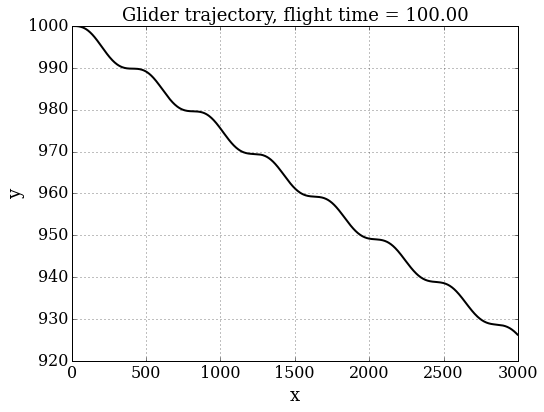

In [8]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y,'k-', lw=2);

In [9]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N  = int(T/dt) + 1
    
    t = numpy.linspace(0.0, T, N)
    
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)
        
    u_values[i] = u

In [10]:
def get_diffgrid(u_current, u_fine, dt):
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
           u_current[:,2]-u_fine[::grid_size_ratio,2]))
    return diffgrid


In [11]:
diffgrid = numpy.empty_like(dt_values)

for i,dt in enumerate(dt_values):
    print('dt={}'.format(dt))
    
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)
    

dt=0.1
dt=0.05
dt=0.01
dt=0.005
dt=0.001


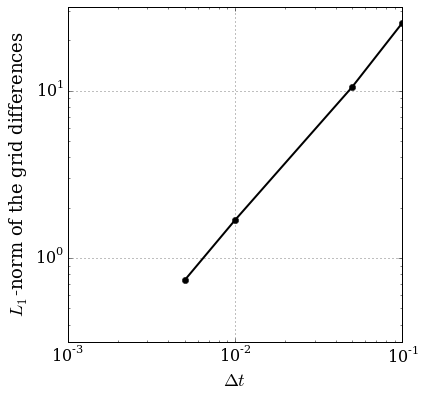

In [12]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

Order of Convergence
The rate at which the numerical solution approaches the exact one as the mesh is refined.

$$p=\frac{log \left( \frac{f_3-f_2}{f_2-f_1} \right)}{log(r)}$$

In [13]:
r = 2
h = 0.001

dt_values2 = numpy.array([h, r*h, r**2*h])
u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)
diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1
    
    t = numpy.linspace(0.0, T, N)
    
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)
        
    u_values2[i] = u
    
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('The order of convergence is p = {:.3f}'.format(p));

The order of convergence is p = 1.014


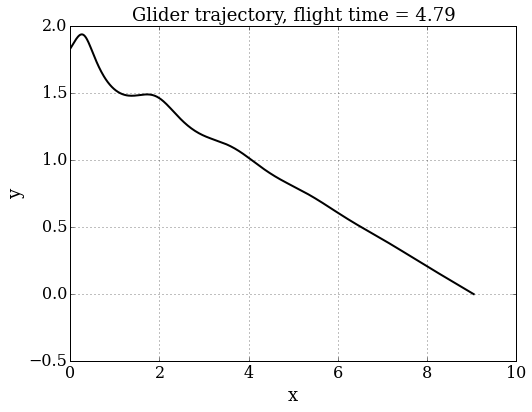

In [106]:
#Model Params
g=9.8
v_t = 2.0
C_D_C_L = 1/5.0

# Iniital Conditions
v0 = v_t # starting at trim velocity
theta0 = 0.5 #initial trajectory angle
x0 = 0 #arbitrary horizontal position
y0 = 1.8288 #meters, or 6ft tall from launch point (my arm)

def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D_C_L*g/v_t**2*v**2,
                       -g*cos(theta)/v + g/v_t**2*v,
                       v*cos(theta),
                       v*sin(theta)])

def euler_step(u, f, dt):
    return u + dt * f(u)

T = 20 #Final Time
dt = 0.01 #increment
N = int(T/dt) + 1 #number of steps
t = numpy.linspace(0, T,N) #time discretization

#initialize array
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])

    #time loop

for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)
    if u[n,3] <= 0:
        break
u = u[0:n+1]
T = ((n)*dt)
    
#Plot the trajectory!
x = u[:,2]
y = u[:,3]

pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y,'k-', lw=2);

Initial Velocity:
10.0
Initial Angle:
0.2
Distance:
16.5180431067


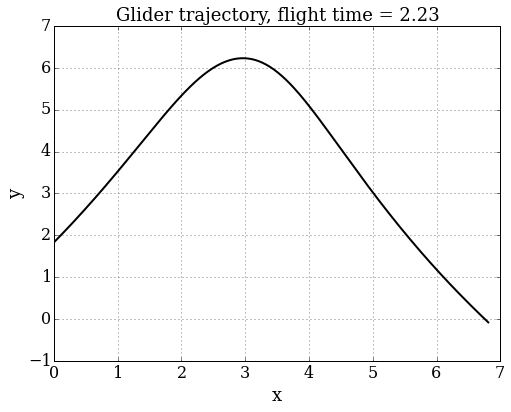

In [150]:
#Model Params
g=9.8
v_t = 5.0
C_D_C_L = 1/5.0

# Iniital Conditions
v0 = v_t # starting at trim velocity
theta0 = 0.1 #initial trajectory angle
x0 = 0 #arbitrary horizontal position
y0 = 1.8288 #meters, or 6ft tall from launch point (my arm)

def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D_C_L*g/v_t**2*v**2,
                       -g*cos(theta)/v + g/v_t**2*v,
                       v*cos(theta),
                       v*sin(theta)])

def euler_step(u, f, dt):
    return u + dt * f(u)

T = 20 #Final Time
dt = 0.01 #increment
N = int(T/dt) + 1 #number of steps
t = numpy.linspace(0, T,N) #time discretization

dTheta = .1
N_Theta = int(1/dTheta)+1
#initialize array
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])

MaxIterations = 10
MaxArray = numpy.empty((MaxIterations*N_Theta, 3))
MaxArray[0] = numpy.array([1, .1, x0])
i=0
    #time loop
for k in range(MaxIterations):
    v_t = k+1
    v0 = v_t
    for o in range(N_Theta-1):
        theta0 = theta0+dTheta
        u = numpy.empty((N, 4))
        u[0] = numpy.array([v0, theta0, x0, y0])
        for n in range(N-1):
            u[n+1] = euler_step(u[n], f, dt)
            if u[n,3] <= 0:
                break
        MaxArray[i+1] = [v0, theta0, u[n,2]]
        i=i+1
    theta0 = 0
    u = u[0:n+1]
    T = ((n)*dt)
    MaxIndex = MaxArray[:,2].argmax()
print('Initial Velocity:')
print(MaxArray[MaxIndex,0])
print('Initial Angle:')
print(MaxArray[MaxIndex,1])
print('Distance:')
print(MaxArray[MaxIndex,2])
#Plot the trajectory!
x = u[:,2]
y = u[:,3]

pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y,'k-', lw=2);